In [1]:
import os
os.chdir('C:\\users\\scuba\\pycharmprojects\\simplebacktester')
os.getcwd()

import pandas as pd
import ffn

import seaborn
%matplotlib inline

from backtest_helpers.compute_weights_RS_DM import compute_weights_RS_DM
from backtest_helpers.compute_weights_PMA import compute_weights_PMA
from backtest_helpers.monthly_return_table import monthly_return_table

portfolios = {
    'RS0001': { 'symbols': ['VCVSX','VWEHX','VFIIX','FGOVX','VWAHX'], 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 2, 'frequency': 'm',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0002': {'symbols': ['MMHYX','FAGIX','VFIIX'], 
               'rs_lookback': 3, 'risk_lookback': 2, 'n_top': 1, 'frequency': 'm',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0003': {'symbols': ['MMHYX','FAGIX','VFIIX'], 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 1, 'frequency': 'q',
              'cash_proxy': 'CASHX', 'risk_free': 0},    
    'DM0001': {'symbols': ['VCVSX','VWINX','VWEHX','VGHCX','VUSTX','VFIIX','VWAHX','FGOVX','FFXSX'], 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 3, 'frequency': 'm',
              'cash_proxy': 'CASHX', 'risk_free': 'FFXSX'},
    'DM0002': {'symbols': ['VCVSX','VUSTX','VWEHX','VFIIX','VGHCX','FRESX'], 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 5, 'frequency': 'm',
              'cash_proxy': 'VFIIX', 'risk_free': 'FFXSX'},
    'PMA001': {'symbols': ['VCVSX', 'VFIIX'], 
               'risk_lookback': 3, 'frequency': 'm', 'allocations': [0.6, 0.4],
              'cash_proxy': 'VUSTX'},
    'PMA002': {'symbols': ['VCVSX', 'VWINX', 'VWEHX'], 
               'risk_lookback': 3, 'frequency': 'm', 'allocations': [0.6, 0.2, 0.2],
              'cash_proxy': 'VUSTX'},
    'PMA003': {'symbols': ['VCVSX', 'FAGIX', 'VGHCX'], 
               'risk_lookback': 2, 'frequency': 'm', 'allocations': [1./3., 1./3., 1./3.],
              'cash_proxy': 'VUSTX'}
    }

RS0001
VCVSX
VWEHX
VFIIX
FGOVX
VWAHX
FIRST BUY DATE = 1986-07-31 00:00:00



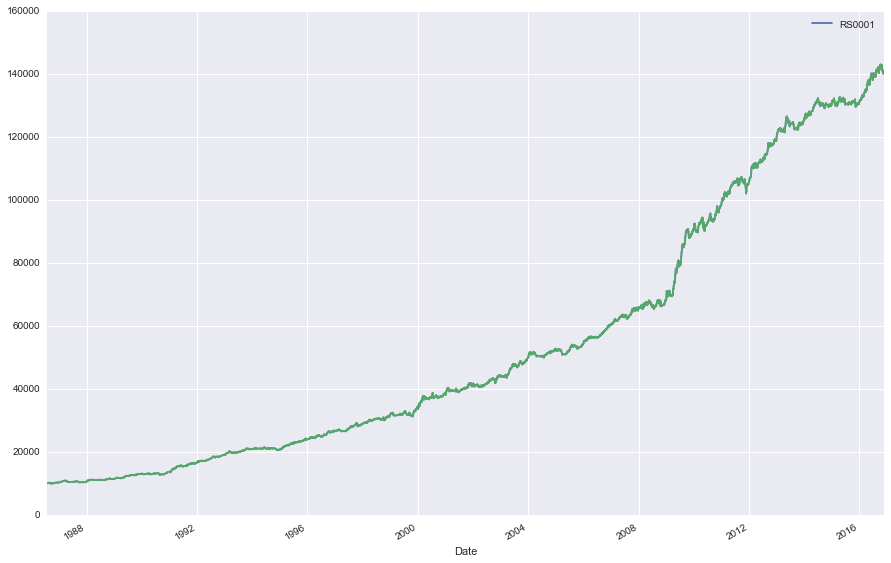

In [2]:
name = 'RS0001'

if 'PMA' in name :
    p_value, p_holdings, p_weights =  compute_weights_PMA (name, portfolios[name])
else :
    p_value, p_holdings, p_weights =  compute_weights_RS_DM (name, portfolios[name])
p_value.plot(figsize=(15, 10), grid=True)

In [3]:
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-07-31 00:00:00 - 2016-11-29 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
1304.96%            2.02  9.10%   -5.64%

Annualized Returns:
mtd     3m      6m     ytd    1y     3y     5y     10y    incep.
------  ------  -----  -----  -----  -----  -----  -----  --------
-0.68%  -0.53%  1.44%  7.33%  8.09%  4.10%  6.47%  8.93%  9.10%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  2.02     1.74       1.41
mean    8.80%    8.87%      9.29%
vol     4.35%    5.10%      6.58%
skew    -0.06    0.48       1.66
kurt    5.46     2.39       4.78
best    1.93%    8.13%      32.82%
worst   -2.74%   -3.83%     -0.97%

Drawdowns:
max     avg       # days
------  ------  --------
-5.64%  -0.72%     20.76

Misc:
---------------  ------
avg. up month    1.39%
avg. down month  -0.86%
up year %        96.67%
12m up %         98.31%
--

G:\Anaconda3\lib\site-packages\ffn\core.py:190: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  self.monthly_prices = obj.resample('M', how='last')
G:\Anaconda3\lib\site-packages\ffn\core.py:193: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  self.yearly_prices = obj.resample('A', how='last')


In [4]:
def highlight_pos_neg (s) :
    is_positive = s > 0    
    return ['background-color : rgb(127,255,0)' if v else 'background-color : rgb(255,99,71)' for v in is_positive]

df = monthly_return_table (p_value)

df.style.\
    apply(highlight_pos_neg)

C:\users\scuba\pycharmprojects\simplebacktester\backtest_helpers\monthly_return_table.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  monthly_returns = daily_prices.resample('M', how='last').pct_change()
C:\users\scuba\pycharmprojects\simplebacktester\backtest_helpers\monthly_return_table.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  annual_returns = daily_prices.resample('12M', how='last').pct_change()[1:].values.round(4) * 100


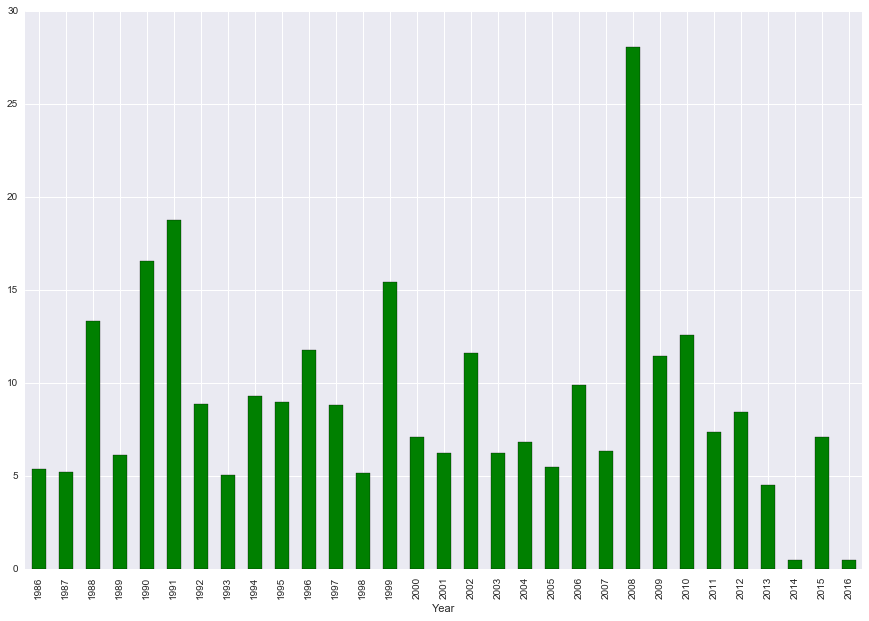

In [18]:
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

# EACH STRATEGY SEPARATELY

RS0001
VCVSX
VWEHX
VFIIX
FGOVX
VWAHX
FIRST BUY DATE = 1986-07-31 00:00:00



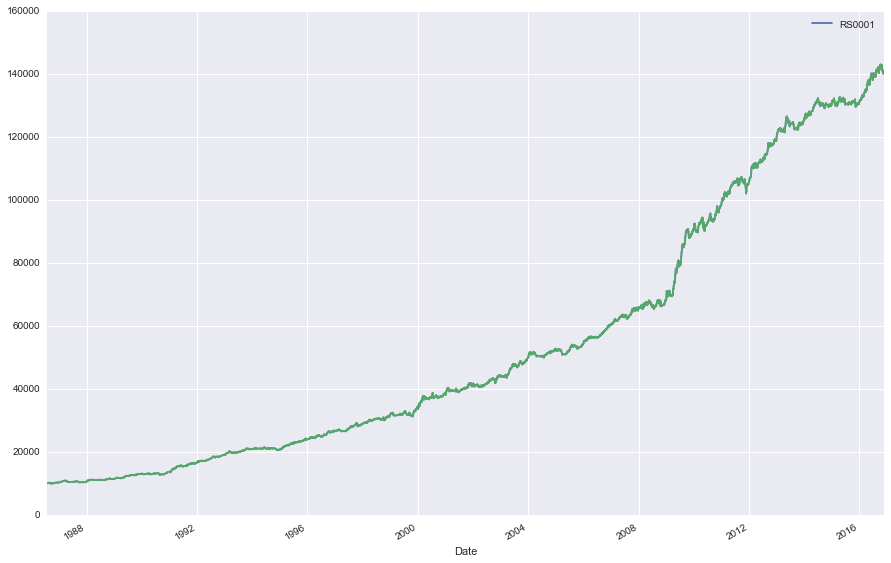

In [4]:
p_value1, p_holdings1, p_weights1 =  compute_weights_RS_DM ('RS0001', portfolios['RS0001'])
p_value1.plot(figsize=(15, 10), grid=True)

RS0002
MMHYX
FAGIX
VFIIX
FIRST BUY DATE = 1984-05-31 00:00:00



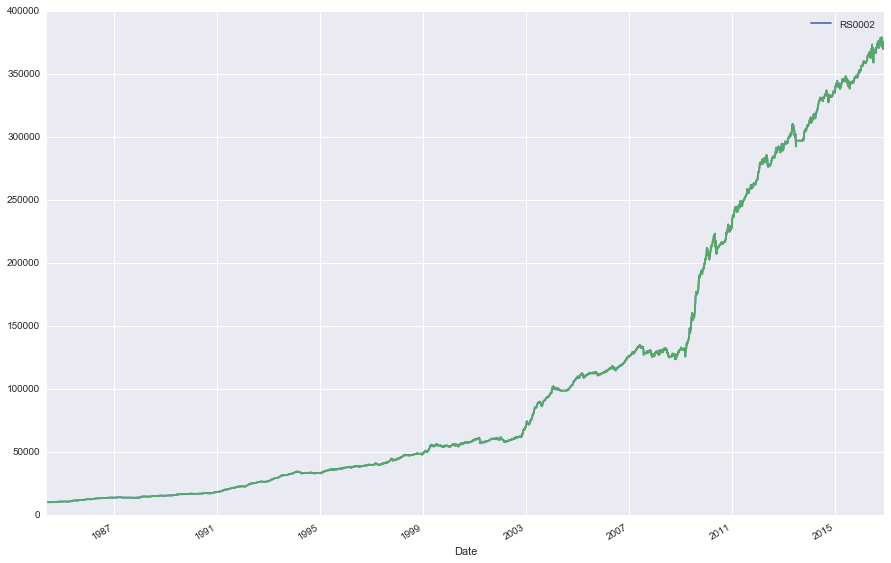

In [5]:
p_value2, p_holdings2, p_weights2 =  compute_weights_RS_DM ('RS0002', portfolios['RS0002'])
p_value2.plot(figsize=(15, 10), grid=True)

RS0003
MMHYX
FAGIX
VFIIX
FIRST BUY DATE = 1984-05-31 00:00:00



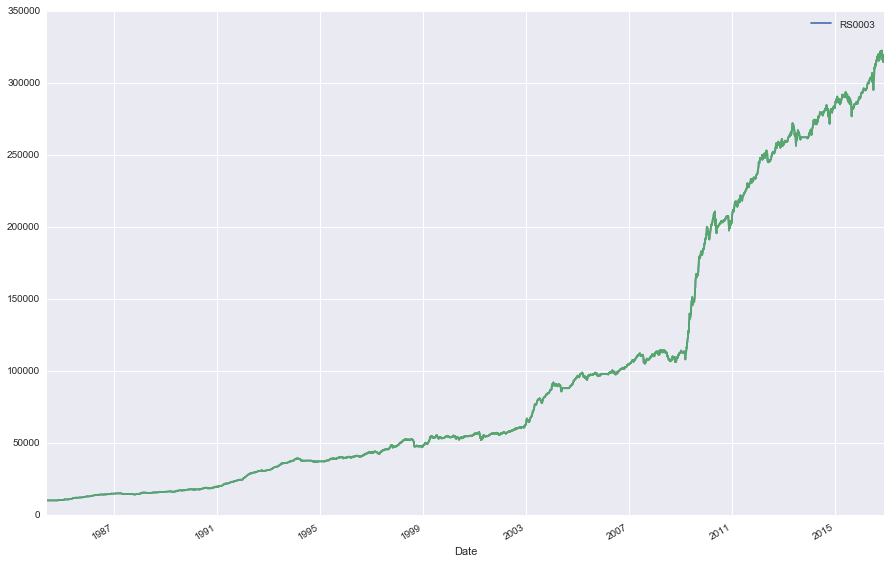

In [6]:
p_value3, p_holdings3, p_weights3 =  compute_weights_RS_DM ('RS0003', portfolios['RS0003'])
p_value3.plot(figsize=(15, 10), grid=True)

DM0001
VWAHX
VCVSX
VGHCX
VUSTX
FFXSX
FGOVX
VWEHX
VWINX
VFIIX
FIRST BUY DATE = 1986-12-31 00:00:00



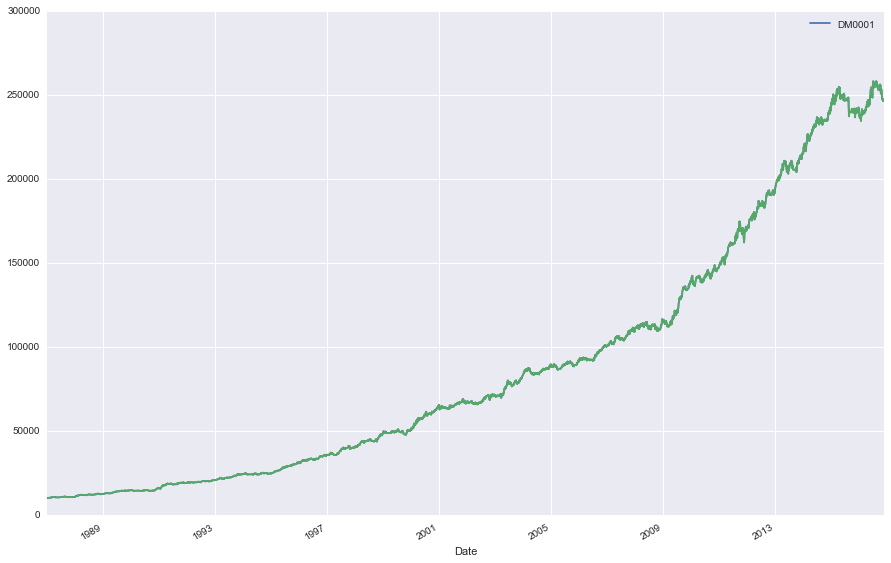

In [7]:
p_value4, p_holdings4, p_weights4 =  compute_weights_RS_DM ('DM0001', portfolios['DM0001'])
p_value4.plot(figsize=(15, 10), grid=True)

DM0002
VCVSX
VGHCX
FRESX
VUSTX
FFXSX
VWEHX
VFIIX
FIRST BUY DATE = 1986-12-31 00:00:00



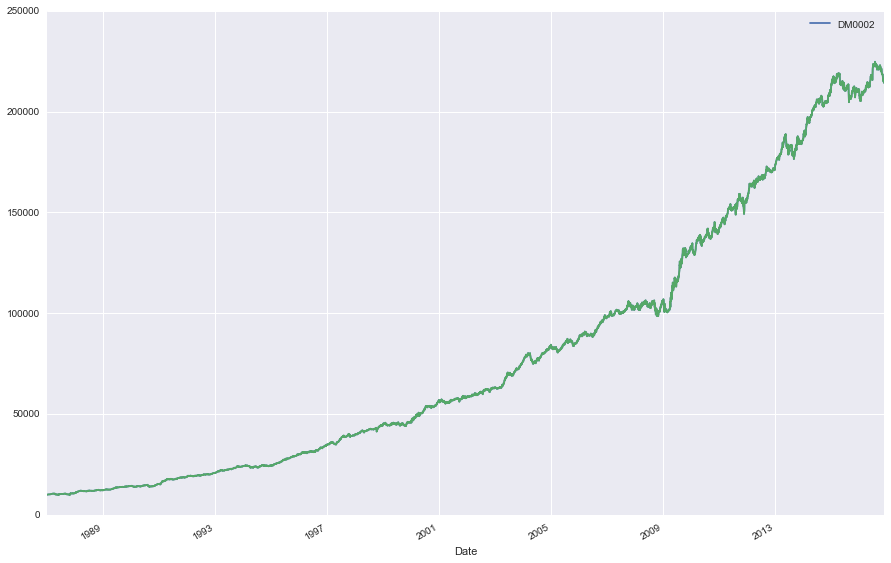

In [8]:
p_value5, p_holdings5, p_weights5 =  compute_weights_RS_DM ('DM0002', portfolios['DM0002'])
p_value5.plot(figsize=(15, 10), grid=True)

PMA001
VCVSX
VFIIX
VUSTX
FIRST BUY DATE = 1986-08-29 00:00:00



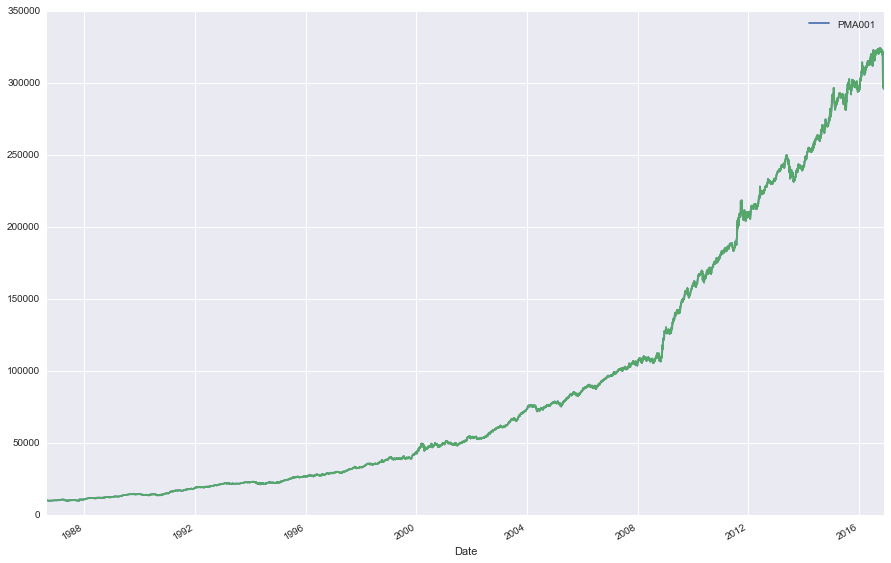

In [9]:
p_value6, p_holdings6, p_weights6 =  compute_weights_PMA ('PMA001', portfolios['PMA001'])
p_value6.plot(figsize=(15, 10), grid=True)

PMA002
VWEHX
VCVSX
VWINX
VUSTX
FIRST BUY DATE = 1986-08-29 00:00:00



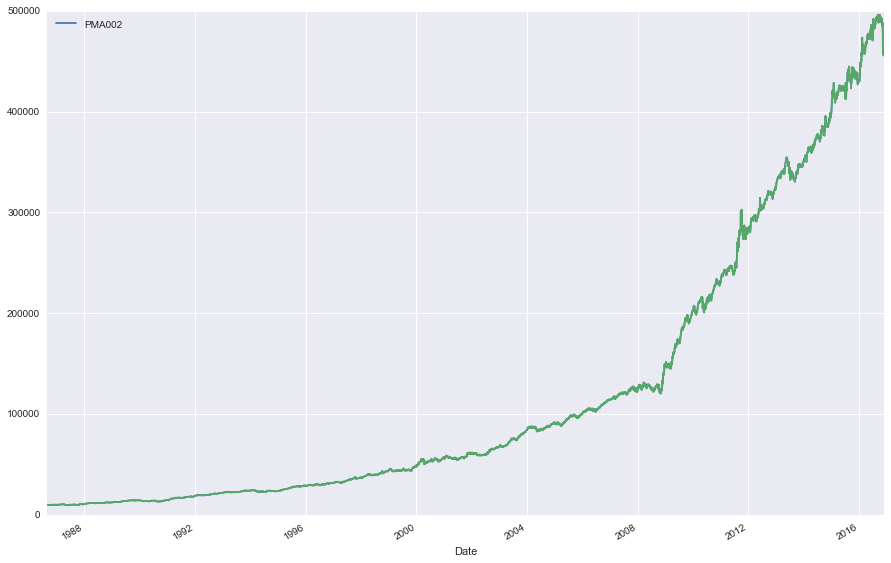

In [10]:
p_value7, p_holdings7, p_weights7 =  compute_weights_PMA ('PMA002', portfolios['PMA002'])
p_value7.plot(figsize=(15, 10), grid=True)

PMA003
FAGIX
VCVSX
VGHCX
VUSTX
FIRST BUY DATE = 1986-07-31 00:00:00



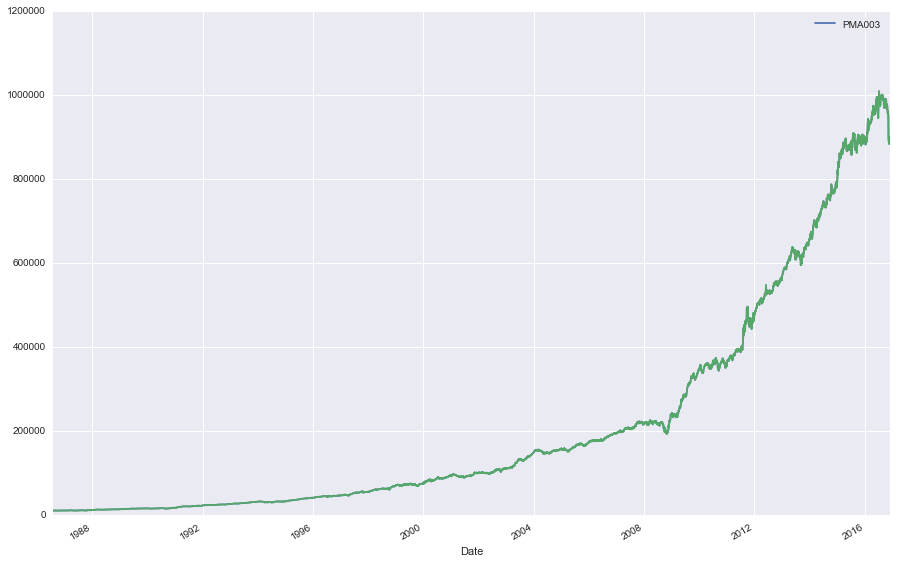

In [11]:
p_value8, p_holdings8, p_weights8 =  compute_weights_PMA ('PMA003', portfolios['PMA003'])
p_value8.plot(figsize=(15, 10), grid=True)